**FINAL PROJECT**

521H0238_Lê Quang Huy


1)	 **Phân tích thống kê trên dữ liệu,
vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu.
Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán**

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [186]:
# read csv file
forest_fires_data = pd.read_csv('forestfires.csv')

In [187]:
# Descriptive statistical analysis
statistical_summary = forest_fires_data.describe()

In [188]:
# check missing values
missing_values = forest_fires_data.isnull().sum()

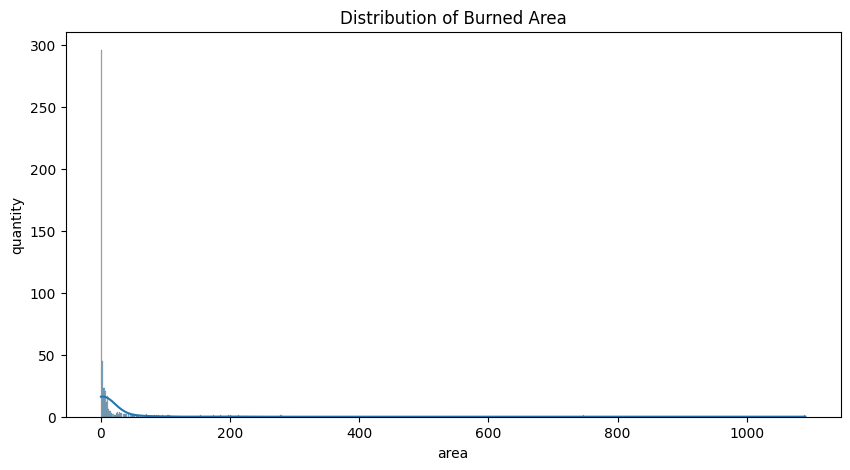

In [189]:
# Phân phối của diện tích bị cháy (biến 'area')
plt.figure(figsize=(10, 5))
sns.histplot(forest_fires_data['area'], kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('area')
plt.ylabel('quantity')
plt.show()

<ipython-input-190-3f811e6731df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest_fires_data.corr(), annot=True, cmap='coolwarm')


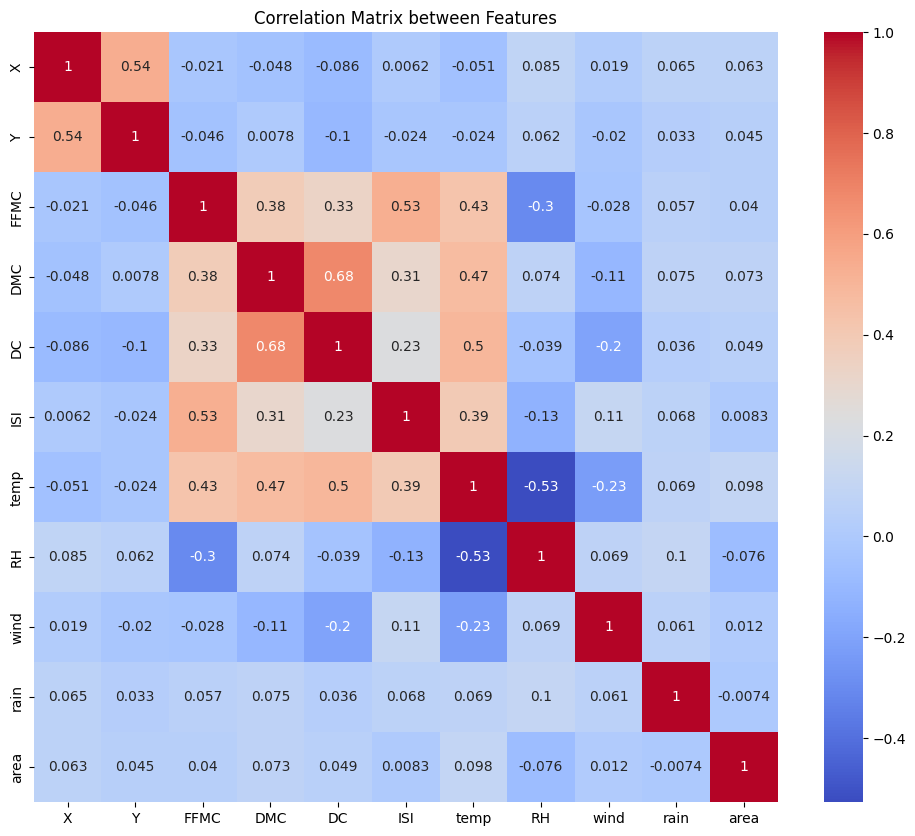

In [190]:
# Correlation chart between quantitative characteristics
plt.figure(figsize=(12, 10))
sns.heatmap(forest_fires_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Features')
plt.show()

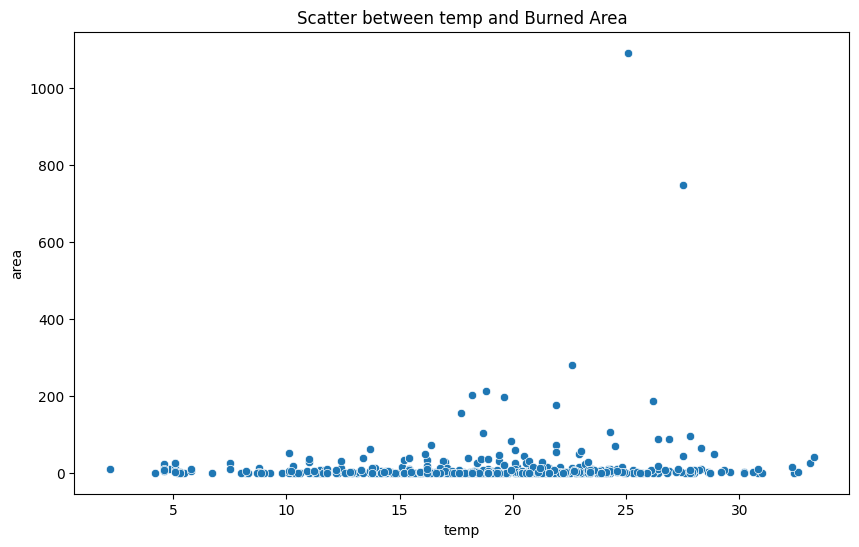

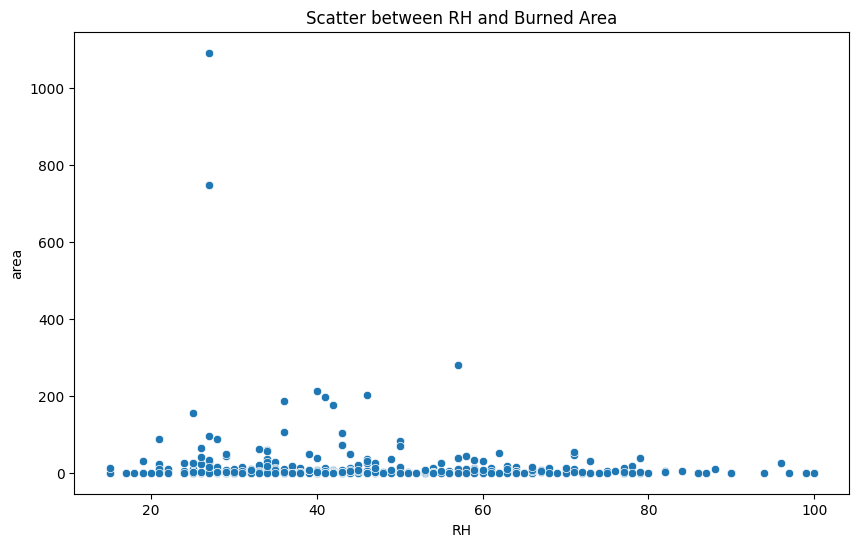

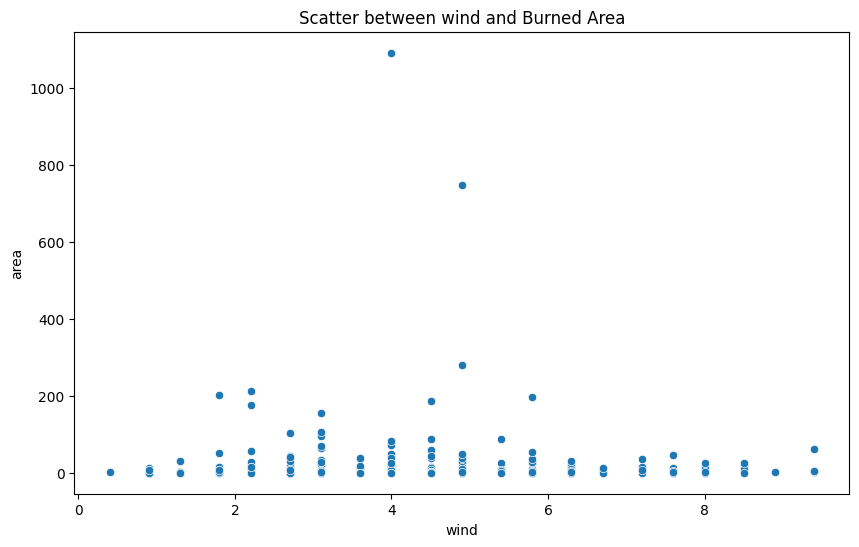

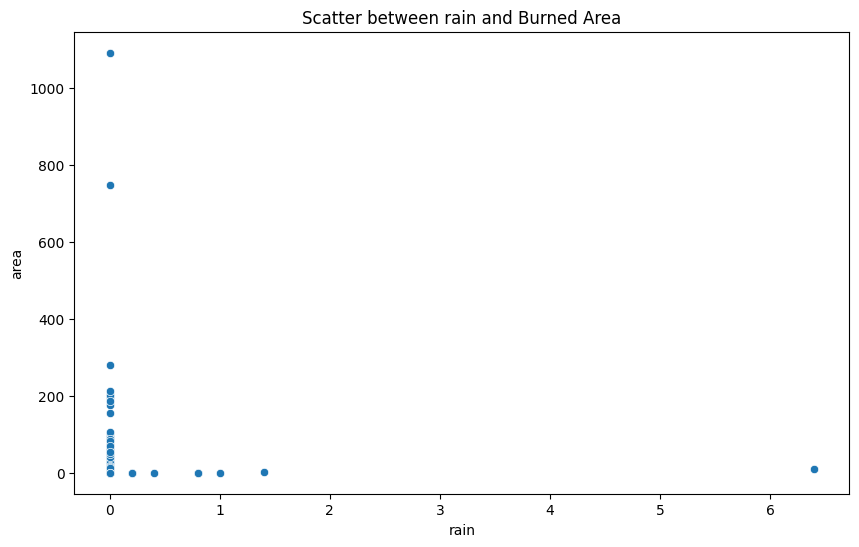

In [191]:
# A scatter plot between burned area and some main characteristics
features = ['temp', 'RH', 'wind', 'rain']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=forest_fires_data[feature], y=forest_fires_data['area'])
    plt.title(f'Scatter between {feature} and Burned Area')
    plt.xlabel(feature)
    plt.ylabel('area')
    plt.show()

**2)	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing**

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [193]:
# Prepare data
# Convert categorical columns to numbers
categorical_features = ['month', 'day']
numerical_features = forest_fires_data.drop(['area', 'month', 'day'], axis=1).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [194]:
# Divide the data into training and testing sets
X = forest_fires_data.drop('area', axis=1)
y = forest_fires_data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
}

In [196]:
# Train and evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE: {mse}')

Linear Regression MSE: 11613.674532130444
Random Forest MSE: 12152.336215203102
Gradient Boosting MSE: 11924.466293204274


**3)	Sử dụng Feed Forward Neural Network**

In [197]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [198]:
# Preprocessing for categorical columns
categorical_features = ['month', 'day']  # List of taxonomy columns
one_hot = OneHotEncoder()

In [199]:
# Prepare data
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', one_hot, categorical_features)
    ],
    remainder='passthrough'  # The remaining numeric columns remain unchanged
)

In [200]:
# Apply preprocessing and normalization
X_processed = preprocessor.fit_transform(forest_fires_data.drop('area', axis=1))
y = forest_fires_data['area']
nn_scaler = MinMaxScaler()
X_scaled = nn_scaler.fit_transform(X_processed)

In [201]:
# Build the FFNN model
ffnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
ffnn_model.compile(optimizer='adam', loss='mean_squared_error')
ffnn_model.fit(X_train_scaled, y_train, epochs=150, batch_size=32)

In [203]:
# Evaluate the model
ffnn_predictions = ffnn_model.predict(X_test_scaled)
ffnn_mse = mean_squared_error(y_test, ffnn_predictions)

4/4 [==============================] - 0s 3ms/step


**Tránh Overfiting trên FFNN bằng dropout**


In [ ]:
from tensorflow.keras.layers import Dropout

ffnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Dropout layer
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer
    Dense(1, activation='linear')
])
ffnn_model.compile(optimizer='adam', loss='mean_squared_error')
ffnn_model.fit(X_train_scaled, y_train, epochs=150, batch_size=32)

**3)	Sử dụng Reccurent Neural Network**

In [205]:
from tensorflow.keras.layers import SimpleRNN
# Prepare data for RNN (need to reshape data)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [206]:
# Build an RNN model
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'),
    Dense(1, activation='linear')
])

In [207]:
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train_rnn, y_train, epochs=150, batch_size=32)

Epoch 1/150
13/13 [==============================] - 1s 2ms/step - loss: 2202.3015
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 2191.3245
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 2179.8613
Epoch 4/150
13/13 [==============================] - 0s 2ms/step - loss: 2170.8823
Epoch 5/150
13/13 [==============================] - 0s 2ms/step - loss: 2160.5933
Epoch 6/150
13/13 [==============================] - 0s 2ms/step - loss: 2151.1128
Epoch 7/150
13/13 [==============================] - 0s 2ms/step - loss: 2138.8352
Epoch 8/150
13/13 [==============================] - 0s 2ms/step - loss: 2129.2668
Epoch 9/150
13/13 [==============================] - 0s 2ms/step - loss: 2118.1782
Epoch 10/150
13/13 [==============================] - 0s 3ms/step - loss: 2108.1929
Epoch 11/150
13/13 [==============================] - 0s 3ms/step - loss: 2100.1899
Epoch 12/150
13/13 [==============================] - 0s 2ms/step - loss: 2092.2048
E

In [208]:
# Evaluate the model
rnn_predictions = rnn_model.predict(X_test_rnn)
rnn_mse = mean_squared_error(y_test, rnn_predictions)

4/4 [==============================] - 0s 3ms/step


**Tránh Overfiting trên RNN bằng Early Stopping**


In [209]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

rnn_model = Sequential([
    SimpleRNN(50, input_shape=(1, X_train_scaled.shape[1]), activation='relu'),
    Dense(1, activation='linear')
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train_rnn, y_train, epochs=150, batch_size=32,
              validation_split=0.2, callbacks=[early_stopping])

Epoch 1/150
11/11 [==============================] - 1s 28ms/step - loss: 2601.5571 - val_loss: 628.9178
Epoch 2/150
11/11 [==============================] - 0s 7ms/step - loss: 2593.5107 - val_loss: 625.0095
Epoch 3/150
11/11 [==============================] - 0s 5ms/step - loss: 2586.7224 - val_loss: 620.8023
Epoch 4/150
11/11 [==============================] - 0s 7ms/step - loss: 2579.2375 - val_loss: 616.4772
Epoch 5/150
11/11 [==============================] - 0s 7ms/step - loss: 2571.6023 - val_loss: 612.0205
Epoch 6/150
11/11 [==============================] - 0s 7ms/step - loss: 2564.6306 - val_loss: 607.4576
Epoch 7/150
11/11 [==============================] - 0s 7ms/step - loss: 2554.9685 - val_loss: 603.3861
Epoch 8/150
11/11 [==============================] - 0s 8ms/step - loss: 2546.9109 - val_loss: 598.6351
Epoch 9/150
11/11 [==============================] - 0s 8ms/step - loss: 2538.1594 - val_loss: 593.7744
Epoch 10/150
11/11 [==============================] - 0s 5ms/st